<a href="https://colab.research.google.com/github/Bagito999/Deep-Learning/blob/main/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Persiapan

In [1]:
# Cek versi Python dan Scikit-Learn
import sys, sklearn
assert sys.version_info >= (3, 5)
assert sklearn.__version__ >= "0.20"

# Import umum
import numpy as np, os
import matplotlib.pyplot as plt
import matplotlib as mpl

# Konfigurasi global
np.random.seed(42)
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Setup path penyimpanan gambar
IMAGES_PATH = "./images/dim_reduction"
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, ext="png", dpi=300):
    path = os.path.join(IMAGES_PATH, f"{fig_id}.{ext}")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=ext, dpi=dpi)


#PCA

In [2]:
# Dataset 3D sintetis dengan noise
np.random.seed(4)
m, w1, w2, noise = 60, 0.1, 0.3, 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0]*w1 + X[:, 1]*w2 + noise * np.random.randn(m)

# SVD manual untuk reduksi dimensi
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
X2D_svd = X_centered @ Vt.T[:, :2]

# PCA dari Scikit-Learn
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2D_pca = pca.fit_transform(X)

# Validasi kesamaan hasil SVD dan PCA
print("SVD vs PCA (identik, beda tanda):", np.allclose(X2D_pca, -X2D_svd))

# Rekonstruksi ke 3D dari 2D
X3D_inv_pca = pca.inverse_transform(X2D_pca)
X3D_inv_svd = X2D_svd @ Vt[:2, :]

# Evaluasi rekonstruksi
print("Rata-rata error rekonstruksi (PCA):", np.mean(np.sum((X - X3D_inv_pca)**2, axis=1)))
print("Kesamaan hasil inverse SVD & PCA (tanpa mean):", np.allclose(X3D_inv_svd, X3D_inv_pca - pca.mean_))

# Komponen utama
print("PCA Components:\n", pca.components_)
print("SVD Vt[:2]:\n", Vt[:2])


SVD vs PCA (identik, beda tanda): False
Rata-rata error rekonstruksi (PCA): 0.01017033779284855
Kesamaan hasil inverse SVD & PCA (tanpa mean): True
PCA Components:
 [[ 0.93636116  0.29854881  0.18465208]
 [-0.34027485  0.90119108  0.2684542 ]]
SVD Vt[:2]:
 [[ 0.93636116  0.29854881  0.18465208]
 [-0.34027485  0.90119108  0.2684542 ]]


#Explained Variance Ratio

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
import os

# Fungsi simpan gambar
def save_fig(fig_id, tight_layout=True, ext="png", dpi=300):
    path = os.path.join("images", "dim_reduction", f"{fig_id}.{ext}")
    os.makedirs(os.path.dirname(path), exist_ok=True)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=ext, dpi=dpi)

# Setup visual
np.random.seed(4)
m, w1, w2, noise = 60, 0.1, 0.3, 0.1
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m)/2
X[:, 1] = np.sin(angles)*0.7 + noise * np.random.randn(m)/2
X[:, 2] = X[:, 0]*w1 + X[:, 1]*w2 + noise * np.random.randn(m)


In [4]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
X2D_svd = X_centered @ Vt.T[:, :2]

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
X3D_inv = pca.inverse_transform(X2D)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Lost Variance:", 1 - pca.explained_variance_ratio_.sum())
print("SVD Variance Proportion:", np.square(s)/np.square(s).sum())


Explained Variance Ratio: [0.84248607 0.14631839]
Lost Variance: 0.011195535570688975
SVD Variance Proportion: [0.84248607 0.14631839 0.01119554]


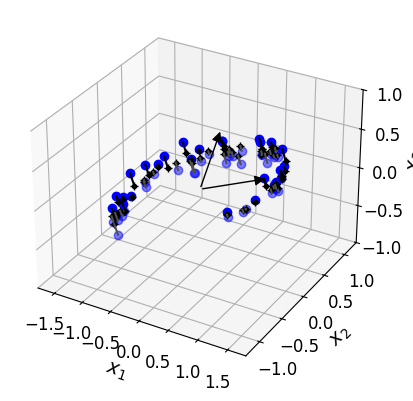

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
import os

# Fungsi simpan gambar
def save_fig(fig_id, tight_layout=True, ext="png", dpi=300):
    path = os.path.join("images", "dim_reduction", f"{fig_id}.{ext}")
    os.makedirs(os.path.dirname(path), exist_ok=True)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=ext, dpi=dpi)

# Kelas Arrow3D yang sudah diperbaiki
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)

    def draw(self, renderer):
        self.do_3d_projection(renderer)
        super().draw(renderer)

# Generate dataset 3D dengan noise
np.random.seed(4)
m, w1, w2, noise = 60, 0.1, 0.3, 0.1
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m)/2
X[:, 1] = np.sin(angles)*0.7 + noise * np.random.randn(m)/2
X[:, 2] = X[:, 0]*w1 + X[:, 1]*w2 + noise * np.random.randn(m)

# PCA
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
X3D_inv = pca.inverse_transform(X2D)
C = pca.components_

# Split data untuk visualisasi
X3D_above = X[X[:, 2] > X3D_inv[:, 2]]
X3D_below = X[X[:, 2] <= X3D_inv[:, 2]]

# Visualisasi
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111, projection='3d')

# Titik data asli dan proyeksi
ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "bo", alpha=0.5)
ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "bo")
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k+")
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "k.")

# Proyeksi garis dari titik ke rekonstruksi
for i in range(m):
    color = "#505050" if X[i, 2] <= X3D_inv[i, 2] else "k"
    ax.plot([X[i, 0], X3D_inv[i, 0]], [X[i, 1], X3D_inv[i, 1]], [X[i, 2], X3D_inv[i, 2]], color)

# Tambahkan panah vektor PCA
arrow1 = Arrow3D([0, C[0, 0]], [0, C[0, 1]], [0, C[0, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k")
arrow2 = Arrow3D([0, C[1, 0]], [0, C[1, 1]], [0, C[1, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k")
ax.add_artist(arrow1)
ax.add_artist(arrow2)

# Label dan batas sumbu
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
ax.set_xlim([-1.8, 1.8])
ax.set_ylim([-1.3, 1.3])
ax.set_zlim([-1.0, 1.0])

save_fig("dataset_3d_plot")
plt.show()


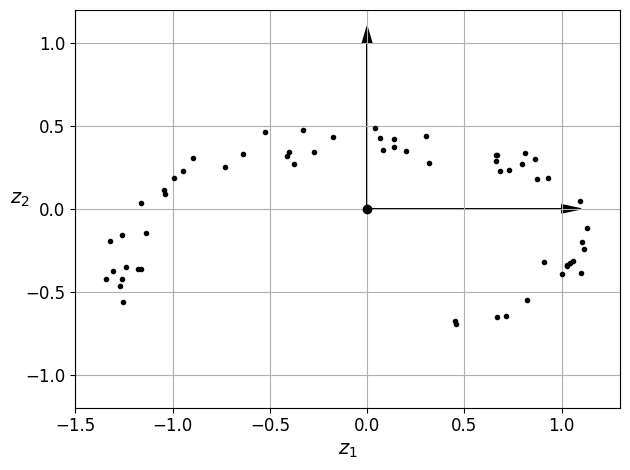

In [7]:
fig, ax = plt.subplots()
ax.plot(X2D[:, 0], X2D[:, 1], "k.")
ax.plot([0], [0], "ko")
ax.arrow(0, 0, 1, 0, head_width=0.05, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, 0, 1, head_width=0.05, head_length=0.1, fc='k', ec='k')
ax.set_xlabel("$z_1$")
ax.set_ylabel("$z_2$", rotation=0)
ax.axis([-1.5, 1.3, -1.2, 1.2])
ax.grid(True)
save_fig("dataset_2d_plot")
plt.show()


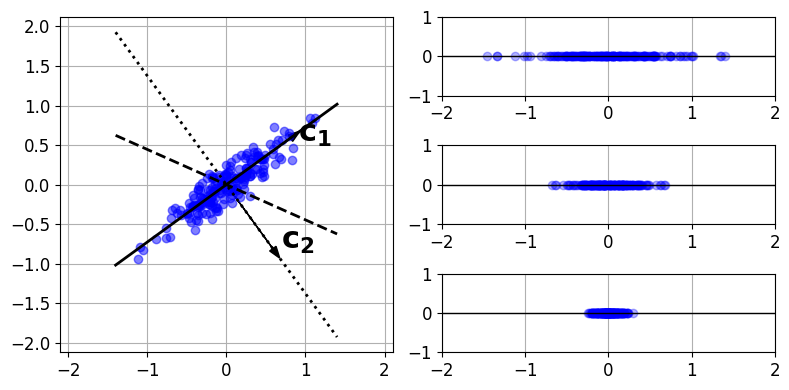

In [8]:
angle = np.pi / 5
stretch = 5
m = 200
np.random.seed(3)
X = np.random.randn(m, 2) / 10
X = X @ np.array([[stretch, 0], [0, 1]])
X = X @ np.array([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]])
u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2*np.pi/6), np.sin(angle - 2*np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])
X_proj1 = X @ u1.reshape(-1, 1)
X_proj2 = X @ u2.reshape(-1, 1)
X_proj3 = X @ u3.reshape(-1, 1)

plt.figure(figsize=(8,4))
plt.subplot2grid((3,2), (0, 0), rowspan=3)
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
for u, style, label in zip([u1, u2, u3], ["-", "--", ":"], [r"$\mathbf{c_1}$", "", r"$\mathbf{c_2}$"]):
    plt.plot([-1.4, 1.4], [-1.4*u[1]/u[0], 1.4*u[1]/u[0]], f"k{style}", linewidth=2)
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, fc='k', ec='k')
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, fc='k', ec='k')
plt.text(u1[0]+0.1, u1[1]-0.05, r"$\mathbf{c_1}$", fontsize=22)
plt.text(u3[0]+0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
plt.axis("equal")
plt.grid(True)

for i, Xp in enumerate([X_proj1, X_proj2, X_proj3]):
    plt.subplot2grid((3,2), (i, 1))
    plt.plot(Xp[:, 0], np.zeros(m), "bo", alpha=0.3)
    plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
    plt.axis([-2, 2, -1, 1])
    plt.grid(True)

save_fig("pca_best_projection_plot")
plt.show()


#Choosing the Right Number of Dimensions

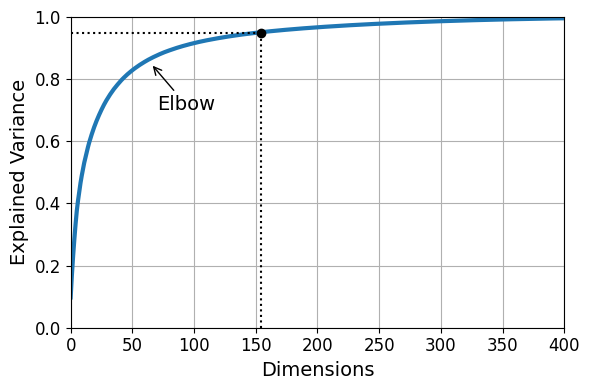

Jumlah komponen yang dipertahankan: 154
Total variansi yang dijelaskan: 0.9504334914295707


In [9]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import os

# Fungsi simpan gambar
def save_fig(fig_id, tight_layout=True, ext="png", dpi=300):
    path = os.path.join("images", "dim_reduction", f"{fig_id}.{ext}")
    os.makedirs(os.path.dirname(path), exist_ok=True)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=ext, dpi=dpi)

# Ambil dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(np.uint8)
X_train, X_test, y_train, y_test = train_test_split(X, y)

# PCA: hitung berapa dimensi untuk 95% variansi
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1  # +1 karena indeks dimulai dari 0

# Visualisasi variansi
plt.figure(figsize=(6, 4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=14)
plt.grid(True)
save_fig("explained_variance_plot")
plt.show()

# Reduksi ke jumlah dimensi yang mempertahankan 95% variansi
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

# Output hasil reduksi
print("Jumlah komponen yang dipertahankan:", pca.n_components_)
print("Total variansi yang dijelaskan:", np.sum(pca.explained_variance_ratio_))


#PCA for Compression

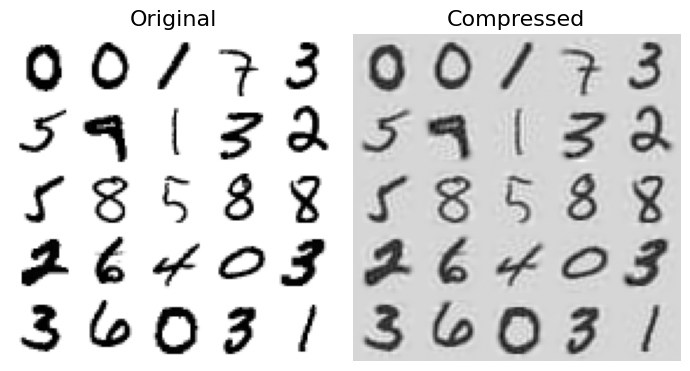

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import os

# Fungsi simpan gambar
def save_fig(fig_id, tight_layout=True, ext="png", dpi=300):
    path = os.path.join("images", "dim_reduction", f"{fig_id}.{ext}")
    os.makedirs(os.path.dirname(path), exist_ok=True)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=ext, dpi=dpi)

# Reduksi dimensi ke 154 komponen dan kembalikan ke bentuk asli
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

# Fungsi visualisasi grid digit
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    n_rows = (len(instances) - 1) // images_per_row + 1
    n_empty = n_rows * images_per_row - len(instances)
    padded = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)
    image_grid = padded.reshape((n_rows, images_per_row, size, size))
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size, images_per_row * size)
    plt.imshow(big_image, cmap=mpl.cm.binary, **options)
    plt.axis("off")

# Visualisasi original vs compressed
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)

plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

save_fig("mnist_compression_plot")
plt.show()

# Simpan hasil reduksi PCA untuk digunakan selanjutnya
X_reduced_pca = X_reduced


#Randomized PCA dan Incremental PCA

In [11]:
from sklearn.decomposition import PCA, IncrementalPCA
import matplotlib.pyplot as plt
import numpy as np
import os, time

# Fungsi simpan gambar
def save_fig(fig_id, tight_layout=True, ext="png", dpi=300):
    path = os.path.join("images", "dim_reduction", f"{fig_id}.{ext}")
    os.makedirs(os.path.dirname(path), exist_ok=True)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=ext, dpi=dpi)

# Visualisasi grid digit
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    n_rows = (len(instances) - 1) // images_per_row + 1
    n_empty = n_rows * images_per_row - len(instances)
    padded = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)
    image_grid = padded.reshape((n_rows, images_per_row, size, size))
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size, images_per_row * size)
    plt.imshow(big_image, cmap="binary", **options)
    plt.axis("off")


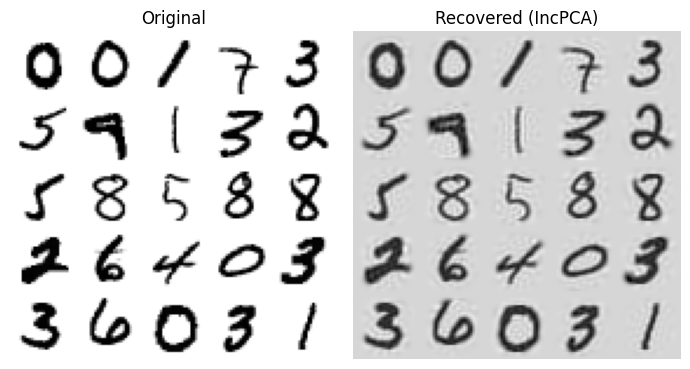

In [12]:
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_reduced_inc = inc_pca.transform(X_train)
X_recovered_inc = inc_pca.inverse_transform(X_reduced_inc)

plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original")
plt.subplot(122)
plot_digits(X_recovered_inc[::2100])
plt.title("Recovered (IncPCA)")
plt.tight_layout()
save_fig("mnist_inc_pca_recovery")
plt.show()


In [13]:
# Reduksi awal dengan PCA full
pca = PCA(n_components=154)
X_reduced_pca = pca.fit_transform(X_train)

# Perbandingan
print("Mean sama:", np.allclose(pca.mean_, inc_pca.mean_))
print("Transformasi hasil hampir sama:", np.allclose(X_reduced_pca, X_reduced_inc))


Mean sama: True
Transformasi hasil hampir sama: False


In [14]:
filename = "my_mnist.data"
m, n = X_train.shape
np.memmap(filename, dtype='float32', mode='write', shape=(m, n))[:] = X_train
del X_train  # untuk menghemat RAM

X_mm = np.memmap(filename, dtype='float32', mode='readonly', shape=(m, n))
inc_pca = IncrementalPCA(n_components=154, batch_size=m // n_batches)
inc_pca.fit(X_mm)


IncrementalPCA(batch_size=525, n_components=154)

In [15]:
for n_components in (2, 10, 154):
    print(f"\nn_components = {n_components}")
    for name, pca in [
        ("PCA", PCA(n_components=n_components, svd_solver="full")),
        ("Inc PCA", IncrementalPCA(n_components=n_components, batch_size=500)),
        ("Rnd PCA", PCA(n_components=n_components, svd_solver="randomized", random_state=42)),
    ]:
        t1 = time.time()
        pca.fit(X_mm)
        t2 = time.time()
        print(f"    {name:8}: {t2 - t1:.2f} seconds")



n_components = 2
    PCA     : 8.66 seconds
    Inc PCA : 26.31 seconds
    Rnd PCA : 1.79 seconds

n_components = 10
    PCA     : 8.29 seconds
    Inc PCA : 25.40 seconds
    Rnd PCA : 4.49 seconds

n_components = 154
    PCA     : 5.98 seconds
    Inc PCA : 39.14 seconds
    Rnd PCA : 5.48 seconds


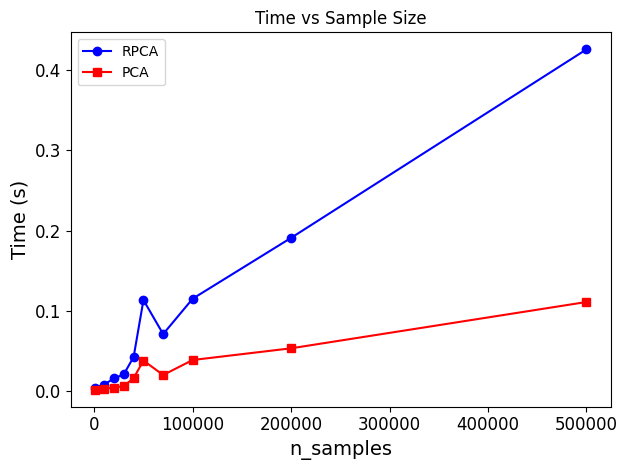

In [16]:
sizes = [1000, 10000, 20000, 30000, 40000, 50000, 70000, 100000, 200000, 500000]
times_rpca, times_pca = [], []

for n_samples in sizes:
    X = np.random.randn(n_samples, 5)
    for method, times in [("randomized", times_rpca), ("full", times_pca)]:
        pca = PCA(n_components=2, svd_solver=method, random_state=42)
        t0 = time.time(); pca.fit(X); times.append(time.time() - t0)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_samples"); plt.ylabel("Time (s)"); plt.legend()
plt.title("Time vs Sample Size"); save_fig("pca_vs_rpca_sample"); plt.show()


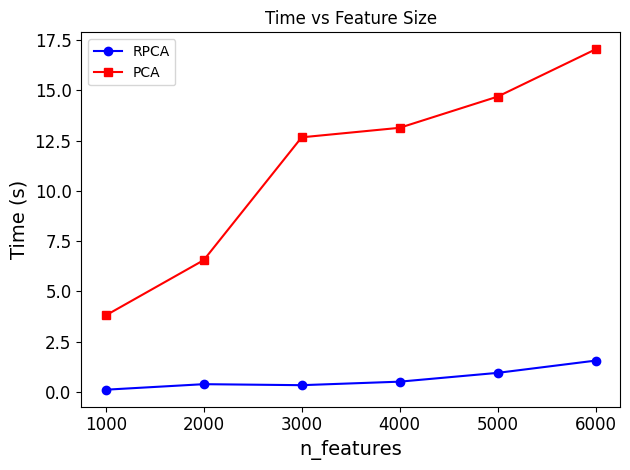

In [17]:
sizes = [1000, 2000, 3000, 4000, 5000, 6000]
times_rpca, times_pca = [], []

for n_features in sizes:
    X = np.random.randn(2000, n_features)
    for method, times in [("randomized", times_rpca), ("full", times_pca)]:
        pca = PCA(n_components=2, svd_solver=method, random_state=42)
        t0 = time.time(); pca.fit(X); times.append(time.time() - t0)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_features"); plt.ylabel("Time (s)"); plt.legend()
plt.title("Time vs Feature Size"); save_fig("pca_vs_rpca_feature"); plt.show()


#Kernel PCA

In [18]:
from sklearn.datasets import make_swiss_roll
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
import numpy as np
import os

# Fungsi simpan gambar
def save_fig(fig_id, tight_layout=True, ext="png", dpi=300):
    path = os.path.join("images", "dim_reduction", f"{fig_id}.{ext}")
    os.makedirs(os.path.dirname(path), exist_ok=True)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=ext, dpi=dpi)

# Data Swiss Roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
y = t > 6.9  # untuk klasifikasi visual


Selecting a Kernel and Tuning Hyperparameters

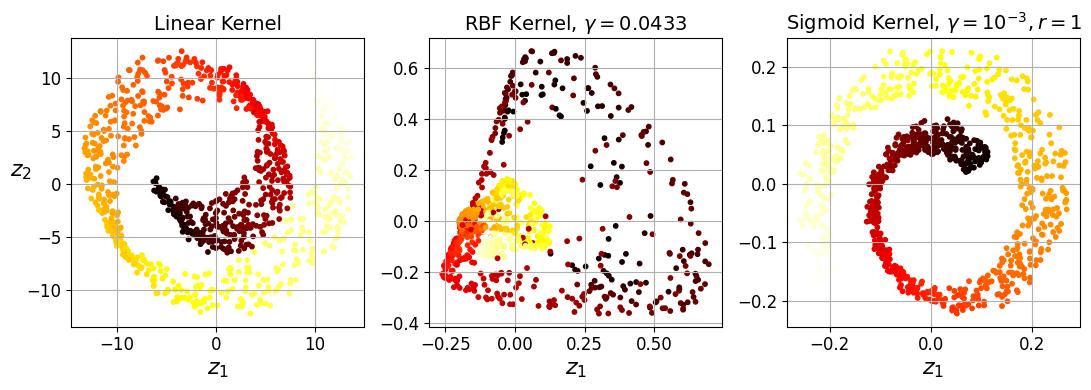

In [19]:
# Setup KernelPCA untuk 3 jenis kernel
lin_pca = KernelPCA(n_components=2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components=2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

plt.figure(figsize=(11, 4))
for subplot, pca, title in (
    (131, lin_pca, "Linear Kernel"),
    (132, rbf_pca, "RBF Kernel, $\gamma=0.0433$"),
    (133, sig_pca, "Sigmoid Kernel, $\gamma=10^{-3}, r=1$")):

    X_reduced = pca.fit_transform(X)
    if subplot == 132:  # Simpan untuk inverse plot
        X_reduced_rbf = X_reduced

    plt.subplot(subplot)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot, s=10)
    plt.title(title, fontsize=14)
    plt.xlabel("$z_1$", fontsize=16)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=16, rotation=0)
    plt.grid(True)

save_fig("kernel_pca_plot")
plt.show()


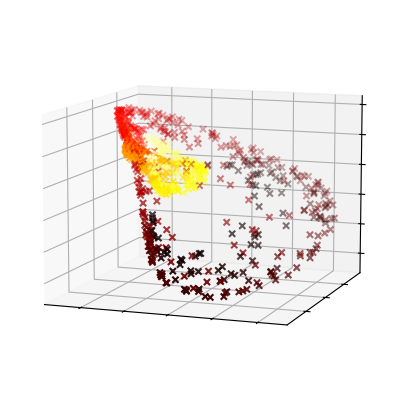

In [20]:
X_inverse = rbf_pca.inverse_transform(X_reduced_rbf)

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection="3d")
ax.view_init(10, -70)
ax.scatter(X_inverse[:, 0], X_inverse[:, 1], X_inverse[:, 2], c=t, cmap=plt.cm.hot, marker="x")
ax.set_xticklabels([]); ax.set_yticklabels([]); ax.set_zticklabels([])
ax.set_xlabel(""); ax.set_ylabel(""); ax.set_zlabel("")

save_fig("preimage_plot", tight_layout=False)
plt.show()


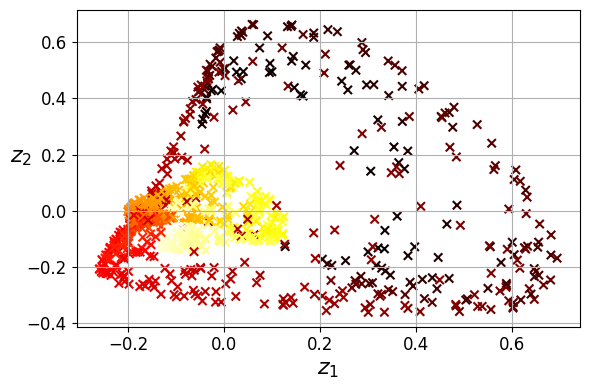

In [21]:
X_reduced = rbf_pca.fit_transform(X)

plt.figure(figsize=(6, 4))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot, marker="x")
plt.xlabel("$z_1$", fontsize=16)
plt.ylabel("$z_2$", fontsize=16, rotation=0)
plt.grid(True)
save_fig("kernel_rbf_projection")
plt.show()


#LLE dan Other Dimensionality Reduction Techniques

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Pipeline + GridSearchCV
clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression(solver="lbfgs"))
])

param_grid = {
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ["rbf", "sigmoid"]
}

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)  # dari swiss roll: y = t > 6.9


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid={'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                         'kpca__kernel': ['rbf', 'sigmoid']})

In [23]:
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

from sklearn.metrics import mean_squared_error
print("MSE preimage:", mean_squared_error(X, X_preimage))


MSE preimage: 32.78630879576607


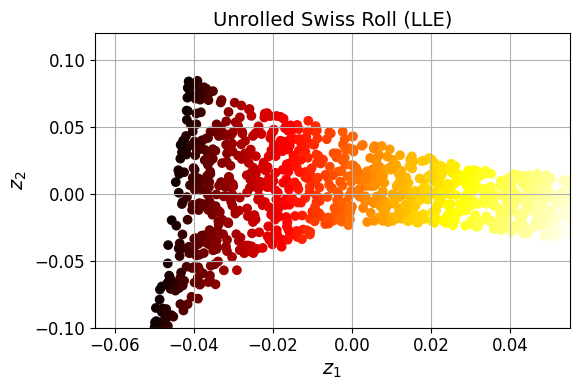

In [24]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

plt.figure(figsize=(6, 4))
plt.title("Unrolled Swiss Roll (LLE)", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$"); plt.ylabel("$z_2$"); plt.grid(True)
plt.axis([-0.065, 0.055, -0.1, 0.12])
save_fig("lle_unrolling_plot")
plt.show()


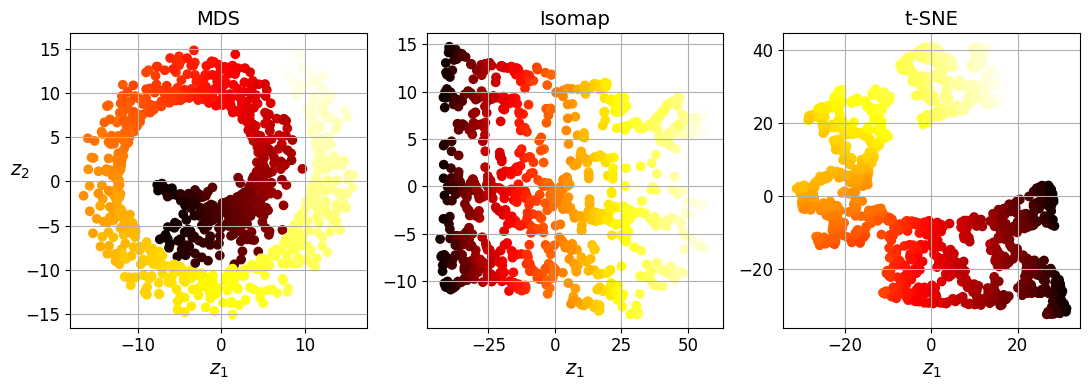

In [25]:
from sklearn.manifold import MDS, Isomap, TSNE

mds = MDS(n_components=2, random_state=42)
isomap = Isomap(n_components=2)
tsne = TSNE(n_components=2, random_state=42)

X_mds = mds.fit_transform(X)
X_iso = isomap.fit_transform(X)
X_tsne = tsne.fit_transform(X)

titles = ["MDS", "Isomap", "t-SNE"]
embeddings = [X_mds, X_iso, X_tsne]

plt.figure(figsize=(11, 4))
for subplot, title, X_red in zip((131, 132, 133), titles, embeddings):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_red[:, 0], X_red[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$")
    if subplot == 131:
        plt.ylabel("$z_2$", rotation=0)
    plt.grid(True)

save_fig("other_dim_reduction_plot")
plt.show()


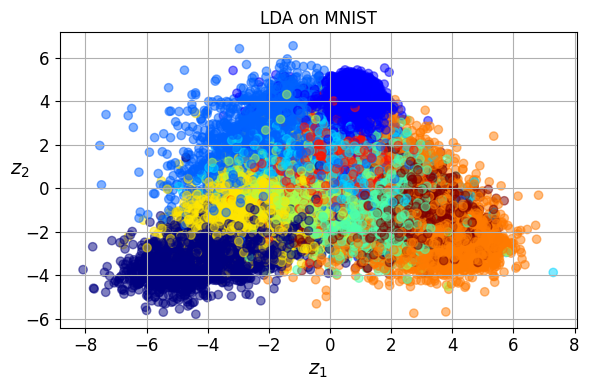

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import numpy as np

# Konversi label menjadi integer
X_mnist = mnist["data"]
y_mnist = mnist["target"].astype(np.uint8)  # ← penting!

# LDA dengan 2 komponen
lda = LinearDiscriminantAnalysis(n_components=2)
X_reduced_lda = lda.fit_transform(X_mnist, y_mnist)

# Visualisasi
plt.figure(figsize=(6, 4))
plt.scatter(X_reduced_lda[:, 0], X_reduced_lda[:, 1], c=y_mnist, cmap="jet", alpha=0.5)
plt.title("LDA on MNIST")
plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
plt.grid(True)
save_fig("lda_mnist_plot")
plt.show()


#  Ringkasan Proses Reduksi Dimensi & Evaluasi

## 🔹 1. PCA (Principal Component Analysis)
- Digunakan untuk mereduksi dimensi dataset MNIST.
- Menentukan jumlah komponen optimal berdasarkan `explained_variance_ratio_`.
- Titik "elbow" membantu menentukan komponen yang mencakup ≥95% variansi.
- Visualisasi `cumsum` digunakan untuk analisis variansi total.

## 🔹 2. Incremental PCA
- Alternatif PCA untuk dataset besar yang tidak muat di memori sekaligus.
- Menggunakan pembelajaran bertahap (batch-wise).
- Hasil mirip dengan PCA biasa, cocok untuk big data seperti MNIST.
- `memmap` digunakan untuk efisiensi memori.

## 🔹 3. Randomized PCA
- Mempercepat proses SVD dengan pendekatan aproksimasi acak.
- Lebih efisien dari PCA biasa (full SVD) untuk dataset besar.
- Diuji dan dibandingkan dalam hal waktu pelatihan terhadap jumlah sampel dan fitur.

## 🔹 4. Perbandingan Waktu Eksekusi PCA
- Randomized PCA jauh lebih cepat dibanding PCA biasa untuk skala besar.
- Kompleksitas waktu meningkat tajam untuk jumlah fitur/sampel besar.
- Visualisasi menunjukkan kurva waktu eksekusi untuk berbagai metode PCA.

## 🔹 5. Kernel PCA
- Mengatasi data nonlinier (contoh: Swiss Roll).
- Tiga kernel dibandingkan: Linear, RBF, dan Sigmoid.
- RBF Kernel terbukti paling efektif membuka struktur manifold nonlinier.

## 🔹 6. Preimage Reconstruction
- RBF Kernel PCA mendukung rekonstruksi balik (inverse transform).
- Evaluasi menggunakan Mean Squared Error (MSE) antara data asli dan hasil rekonstruksi.
- Menunjukkan kualitas informasi yang dipertahankan pasca reduksi.

## 🔹 7. LLE (Locally Linear Embedding)
- Digunakan untuk memproyeksikan manifold kompleks ke 2D (Swiss Roll).
- Menyimpan informasi lokal dengan cukup baik.
- Cocok untuk eksplorasi data nonlinier.

## 🔹 8. Metode Dimensi Nonlinear Lainnya
- **MDS (Multidimensional Scaling)**: mempertahankan jarak absolut.
- **Isomap**: mempertahankan jarak geodesik.
- **t-SNE**: sangat efektif untuk visualisasi klaster, tidak cocok untuk prediksi.
- Masing-masing memiliki keunikan dalam membentuk proyeksi data.

## 🔹 9. LDA (Linear Discriminant Analysis)
- Supervised dimensionality reduction.
- Menggunakan label kelas untuk memaksimalkan separabilitas antar kelas.
- Diterapkan pada MNIST dan menghasilkan visualisasi separasi digit yang baik.

---

##  Kesimpulan

- **PCA dan variannya** (Incremental & Randomized PCA) cocok untuk data besar dan linear.
- **Kernel PCA (terutama RBF)** sangat berguna untuk data nonlinier.
- **LLE, Isomap, MDS, dan t-SNE** sangat baik untuk visualisasi manifold nonlinier.
- **LDA** sangat optimal untuk klasifikasi berbasis label karena mempertahankan informasi diskriminatif.
- **Pemilihan teknik** bergantung pada tujuan utama: efisiensi komputasi, interpretabilitas, visualisasi, atau klasifikasi.

